In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from datetime import date, datetime

In [3]:
india_daily = pd.read_csv('./Wheat Futures India Daily (2015-22).csv',index_col=0)
india_weekly = pd.read_csv('./Wheat Futures India Weekly (2012-22).csv',index_col=0)
india_monthly = pd.read_csv('./Wheat Futures India Monthly (2007-22).csv',index_col=0)

In [14]:
india_daily = india_daily.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_weekly = india_weekly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)
india_monthly = india_monthly.replace({',': '', 'K':'', '%':''}, regex=True).astype(float)

In [15]:
india_daily

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
20-04-2022,2373.0,2373.0,2373.0,2373.0,NaN,3.13
19-04-2022,2301.0,2301.0,2301.0,2301.0,NaN,2.22
18-04-2022,2251.0,2251.0,2251.0,2251.0,NaN,2.23
14-04-2022,2202.0,2202.0,2202.0,2202.0,NaN,0.00
13-04-2022,2202.0,2202.0,2202.0,2202.0,NaN,0.00
...,...,...,...,...,...,...
26-05-2015,1482.0,1469.0,1485.0,1469.0,7.93,0.61
25-05-2015,1473.0,1484.0,1490.0,1468.0,5.96,-1.07
22-05-2015,1489.0,1502.0,1502.0,1487.0,4.38,-0.47


In [16]:
dly_chng = [0]*len(india_daily.Open.values)
weekly_chng = [0]*len(india_weekly.Open.values)
monthly_chng = [0]*len(india_monthly.Open.values)

for i in range(1, len(india_daily.Open.values)):
    dly_chng[i] = round((india_daily.Open.values[i] - india_daily.Open.values[i-1])/india_daily.Open.values[i-1] * 100, 2)

for i in range(1, len(india_weekly.Open.values)):
    weekly_chng[i] = round((india_weekly.Open.values[i] - india_weekly.Open.values[i-1])/india_weekly.Open.values[i-1] * 100, 2)

for i in range(1, len(india_monthly.Open.values)):
    monthly_chng[i] = round((india_monthly.Open.values[i] - india_monthly.Open.values[i-1])/india_monthly.Open.values[i-1] * 100, 2)

In [7]:
# dly_ret = [0]*len(india_daily.Open.values)
# weekly_ret = [0]*len(india_weekly.Open.values)
# monthly_ret = [0]*len(india_monthly.Open.values)

# for i in range(1, len(india_daily.Open.values)):
#     dly_ret[i] = round((india_daily.Open.values[i] - india_daily.Open.values[0])/india_daily.Open.values[0] * 100, 2)

# for i in range(1, len(india_weekly.Open.values)):
#     weekly_ret[i] = round((india_weekly.Open.values[i] - india_weekly.Open.values[0])/india_weekly.Open.values[0] * 100, 2)

# for i in range(1, len(india_monthly.Open.values)):
#     monthly_ret[i] = round((india_monthly.Open.values[i] - india_monthly.Open.values[0])/india_monthly.Open.values[0] * 100, 2)


In [17]:
dly_diff = [0]*len(india_daily.Open.values)
weekly_diff = [0]*len(india_weekly.Open.values)
monthly_diff = [0]*len(india_monthly.Open.values)

for i in range(1, len(india_daily.Open.values)):
    dly_diff[i] = round((india_daily.Open.values[i] - india_daily.Open.values[i-1]), 2)

for i in range(1, len(india_weekly.Open.values)):
    weekly_diff[i] = round((india_weekly.Open.values[i] - india_weekly.Open.values[i-1]), 2)

for i in range(1, len(india_monthly.Open.values)):
    monthly_diff[i] = round((india_monthly.Open.values[i] - india_monthly.Open.values[i-1]), 2)

In [18]:
india_weekly

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
17-04-2022,2373.0,2251.0,2251.0,2251.0,NaN,7.77
10-04-2022,2202.0,2203.0,2203.0,2203.0,NaN,-0.63
03-04-2022,2216.0,2217.0,2217.0,2217.0,NaN,-1.73
27-03-2022,2255.0,2331.0,2331.0,2256.0,NaN,-2.25
20-03-2022,2307.0,2258.0,2258.0,2258.0,NaN,2.12
...,...,...,...,...,...,...
06-05-2012,1172.0,1184.0,1196.0,1170.0,19.23,-0.85
29-04-2012,1182.0,1193.0,1219.0,1168.0,21.71,-0.25
22-04-2012,1185.0,1205.0,1211.0,1165.0,26.43,0.34


In [19]:
india_daily['Daily Change (%)'] = dly_chng
india_weekly['Weekly Change (%)'] = weekly_chng
india_monthly['Monthly Change (%)'] = monthly_chng

india_daily['Daily Change'] = dly_diff
india_weekly['Weekly Change'] = weekly_diff
india_monthly['Monthly Change'] = monthly_diff

# india_daily['Returns (%)'] = dly_ret
# india_weekly['Returns (%)'] = weekly_ret
# india_monthly['Returns (%)'] = monthly_ret

In [20]:
india_daily['Daily Change (%) Squared'] = np.square(india_daily['Daily Change (%)'].values)
india_weekly['Weekly Change (%) Squared'] = np.square(india_weekly['Weekly Change (%)'].values)
india_monthly['Monthly Change (%) Squared'] = np.square(india_monthly['Monthly Change (%)'].values)

india_daily['Daily Change Squared'] = np.square(india_daily['Daily Change'].values)
india_weekly['Weekly Change Squared'] = np.square(india_weekly['Weekly Change'].values)
india_monthly['Monthly Change Squared'] = np.square(india_monthly['Monthly Change'].values)

In [21]:
india_daily.head()

,Price,Open,High,Low,Vol.,Change %,Daily Change (%),Daily Change,Daily Change (%) Squared,Daily Change Squared
Date,,,,,,,,,,
20-04-2022,2373.0,2373.0,2373.0,2373.0,NaN,3.13,0.00,0.0,0.0000,0.0
19-04-2022,2301.0,2301.0,2301.0,2301.0,NaN,2.22,-3.03,-72.0,9.1809,5184.0
18-04-2022,2251.0,2251.0,2251.0,2251.0,NaN,2.23,-2.17,-50.0,4.7089,2500.0
14-04-2022,2202.0,2202.0,2202.0,2202.0,NaN,0.00,-2.18,-49.0,4.7524,2401.0
13-04-2022,2202.0,2202.0,2202.0,2202.0,NaN,0.00,0.00,0.0,0.0000,0.0


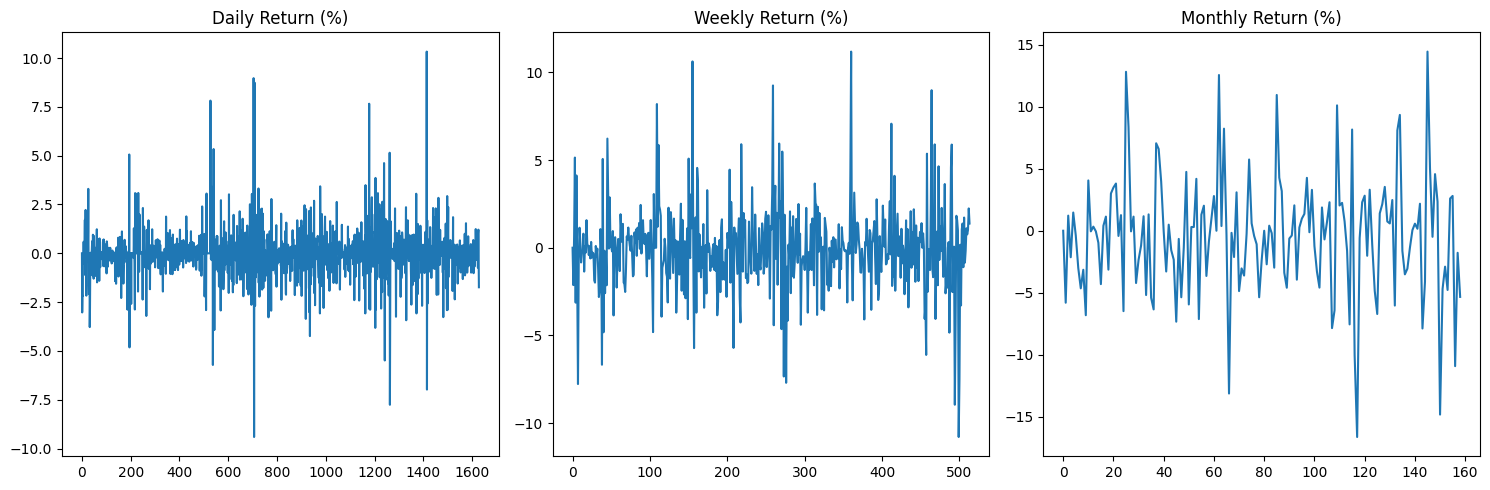

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(india_daily['Daily Change (%)'].values)
axs[0].set_title('Daily Return (%)')

# Plot in the second subplot
axs[1].plot(india_weekly['Weekly Change (%)'].values)
axs[1].set_title('Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(india_monthly['Monthly Change (%)'].values)
axs[2].set_title('Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:4: RuntimeWarning: divide by zero encountered in log
  axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:4: RuntimeWarning: invalid value encountered in log
  axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:8: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:8: RuntimeWarning: invalid value encountered in log
  axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:12: RuntimeWarning: divide by zero encountered in log
  axs[2].plot(np.log(india_monthly['Monthly Change (%)'].values))
C:\Users\X Warrior\AppData\Local\Temp\ipykernel_23596\3695383218.py:12: Runtim

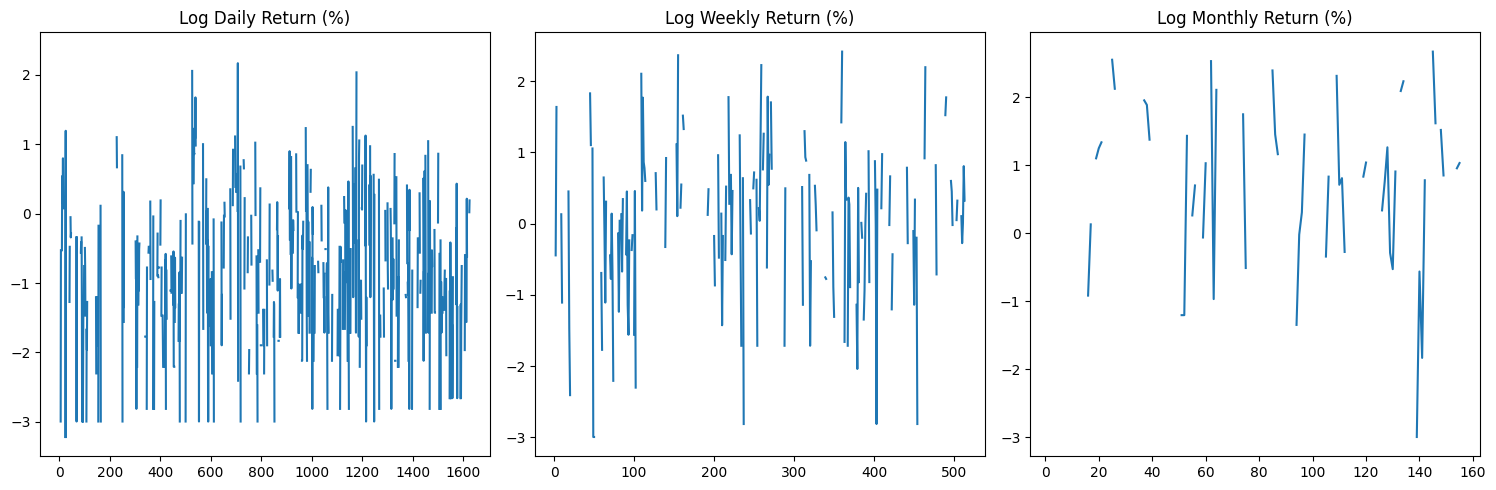

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot in the first subplot
axs[0].plot(np.log(india_daily['Daily Change (%)'].values))
axs[0].set_title('Log Daily Return (%)')

# Plot in the second subplot
axs[1].plot(np.log(india_weekly['Weekly Change (%)'].values))
axs[1].set_title('Log Weekly Return (%)')

# Plot in the third subplot
axs[2].plot(np.log(india_monthly['Monthly Change (%)'].values))
axs[2].set_title('Log Monthly Return (%)')

# Display the plots
plt.tight_layout()
plt.show()

In [24]:
no_of_lags = 400

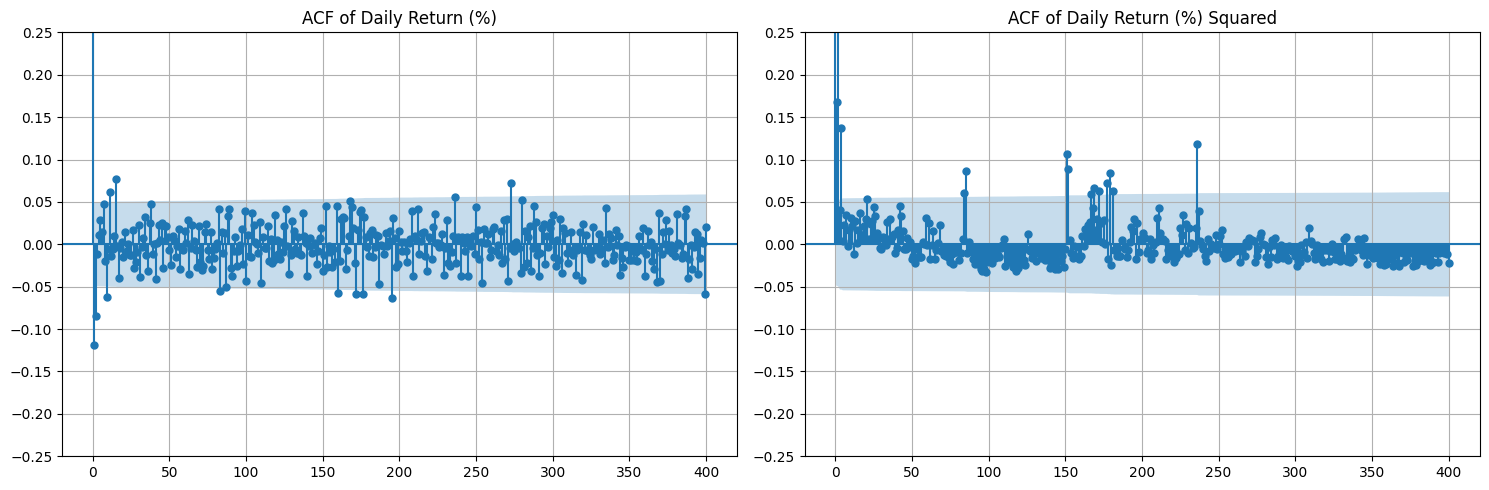

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_daily[['Daily Change (%)']], ax=axs[0], title='ACF of Daily Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_daily[['Daily Change (%) Squared']], ax=axs[1], title='ACF of Daily Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

plt.tight_layout()
plt.show()

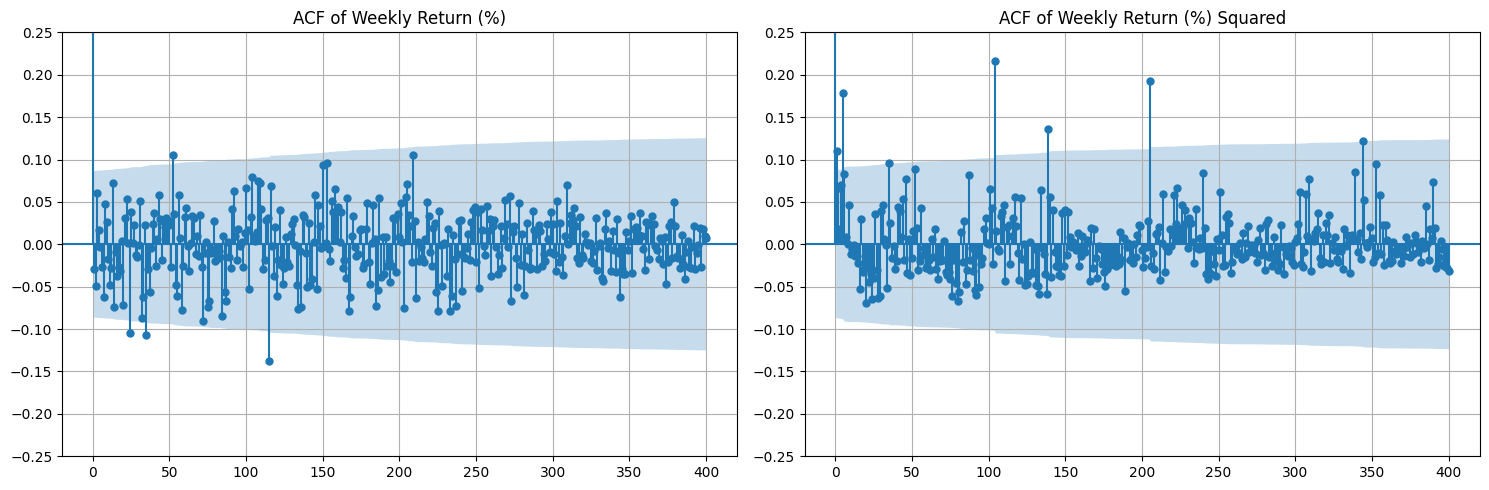

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plt.yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the first subplot
plot_acf(india_weekly[['Weekly Change (%)']], ax=axs[0], title='ACF of Weekly Return (%)', lags=no_of_lags)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_weekly[['Weekly Change (%) Squared']], ax=axs[1], title='ACF of Weekly Return (%) Squared', lags=no_of_lags)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Display the plots
plt.tight_layout()
#plt.grid(True)
plt.show()

In [27]:
len(india_weekly)

514

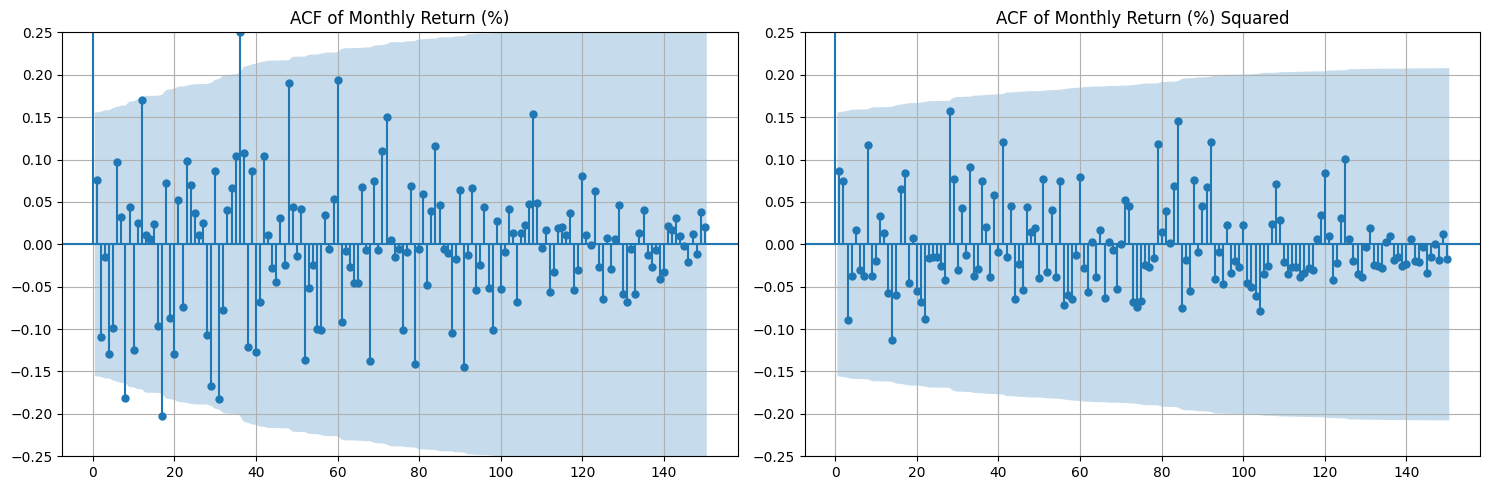

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_monthly[['Monthly Change (%)']], ax=axs[0], title='ACF of Monthly Return (%)', lags=150)
axs[0].set_ylim(-0.25, 0.25)
axs[0].grid(True)
axs[0].set_yticks(np.arange(-0.25, 0.3, 0.05))

# Plot in the second subplot
plot_acf(india_monthly[['Monthly Change (%) Squared']], ax=axs[1], title='ACF of Monthly Return (%) Squared', lags=150)
axs[1].set_ylim(-0.25, 0.25)
axs[1].grid(True)
axs[1].set_yticks(np.arange(-0.25, 0.3, 0.05))
# Display the plots
plt.tight_layout()
plt.show()

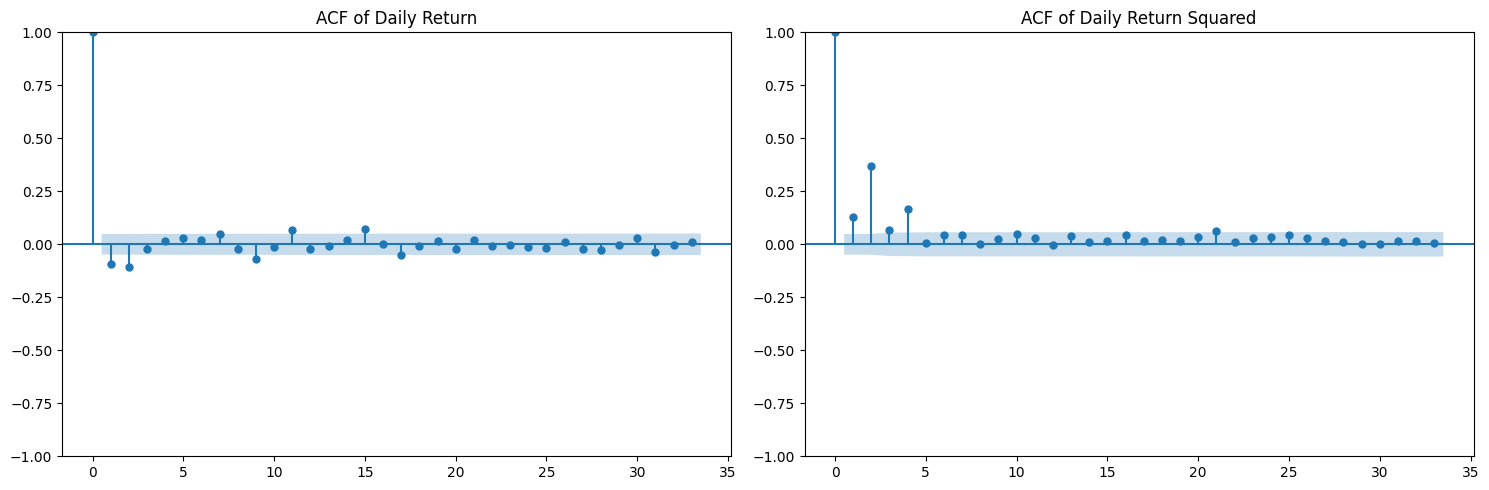

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_daily[['Daily Change']], ax=axs[0], title='ACF of Daily Return')
# axs[0].set_title('Weekly Return (%)')

# Plot in the second subplot
plot_acf(india_daily[['Daily Change Squared']], ax=axs[1], title='ACF of Daily Return Squared')
# axs[1].set_title('Weekly Return (%) Squared')
# Display the plots
plt.tight_layout()
plt.show()

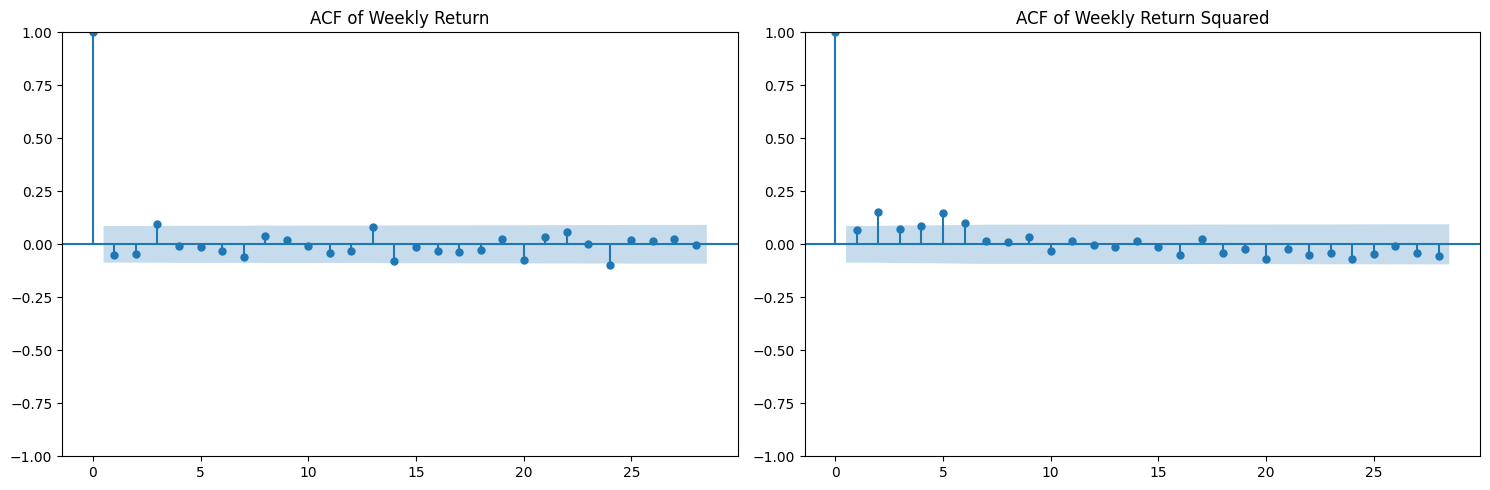

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_weekly[['Weekly Change']], ax=axs[0], title='ACF of Weekly Return')
# axs[0].set_title('Weekly Return (%)')

# Plot in the second subplot
plot_acf(india_weekly[['Weekly Change Squared']], ax=axs[1], title='ACF of Weekly Return Squared')
# axs[1].set_title('Weekly Return (%) Squared')
# Display the plots
plt.tight_layout()
plt.show()

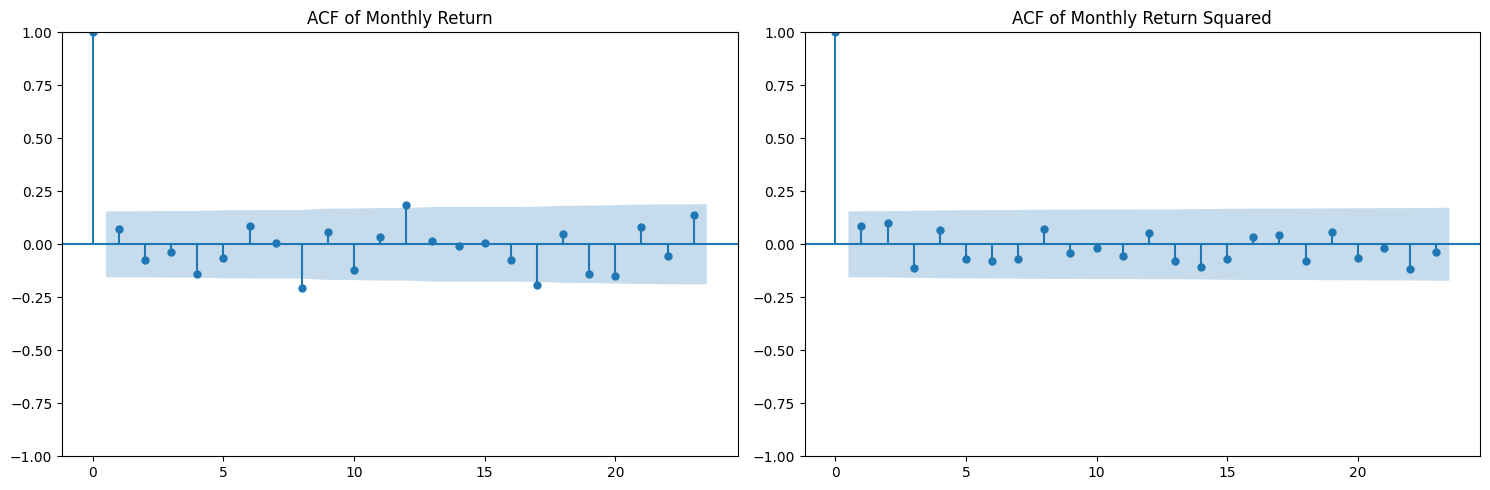

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot in the first subplot
plot_acf(india_monthly[['Monthly Change']], ax=axs[0], title='ACF of Monthly Return')
# axs[0].set_title('Weekly Return (%)')

# Plot in the second subplot
plot_acf(india_monthly[['Monthly Change Squared']], ax=axs[1], title='ACF of Monthly Return Squared')
# axs[1].set_title('Weekly Return (%) Squared')
# Display the plots
plt.tight_layout()
plt.show()

(array([ 2.,  2.,  5., 23., 31., 53., 30.,  5.,  5.,  3.]),
 array([-16.65 , -13.539, -10.428,  -7.317,  -4.206,  -1.095,   2.016,
          5.127,   8.238,  11.349,  14.46 ]),
 <BarContainer object of 10 artists>)

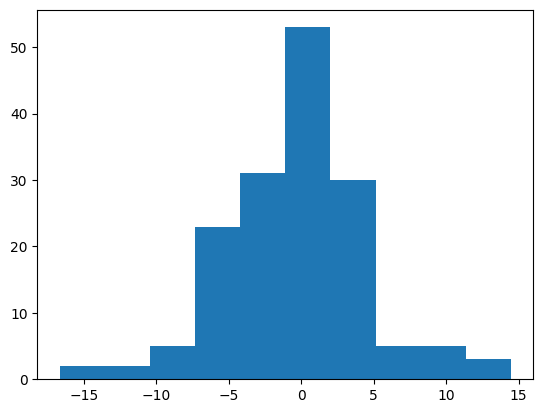

In [33]:
plt.hist(india_monthly['Monthly Change (%)'])